# Máquinas Vectoriales de Soporte (SVM)

### 2. Transformación de los datos para SVM

Dataset cargado correctamente con forma: (1460, 80)

Primeras filas con variable categórica:


,SalePrice,PrecioCategoria
0,208500,media
1,181500,media
2,223500,media
3,140000,barata
4,250000,media



Distribución de categorías de precio:
PrecioCategoria
media     730
barata    615
cara      115
Name: count, dtype: int64


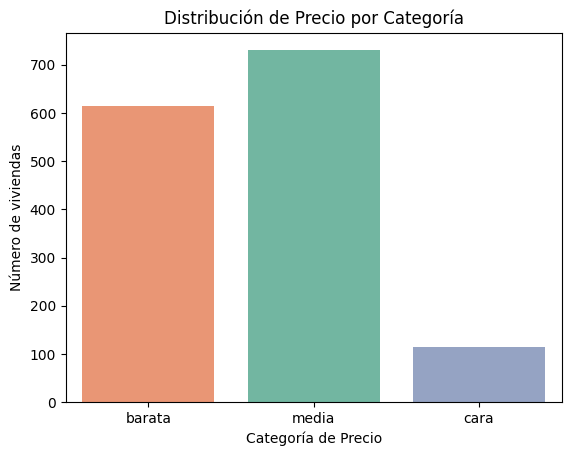


Forma final de X después de codificación y escalado: (1460, 287)
Mapeo de clases objetivo: {'barata': np.int64(0), 'cara': np.int64(1), 'media': np.int64(2)}

Distribución codificada de clases:


Código
cara      730
barata    615
media     115
Name: count, dtype: int64

In [2]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Cargar el dataset
df = pd.read_csv("../data/train_preprocessed.csv")
print("Dataset cargado correctamente con forma:", df.shape)

# Crear variable categórica a partir del precio
def categorizar_precio(valor):
    if valor < 150000:
        return 'barata'
    elif valor < 300000:
        return 'media'
    else:
        return 'cara'

df['PrecioCategoria'] = df['SalePrice'].apply(categorizar_precio)
print("\nPrimeras filas con variable categórica:")
display(df[['SalePrice', 'PrecioCategoria']].head())

# Mostrar distribución de clases
print("\nDistribución de categorías de precio:")
print(df['PrecioCategoria'].value_counts())

sns.countplot(x='PrecioCategoria', hue='PrecioCategoria', data=df, order=['barata', 'media', 'cara'], palette='Set2', legend=False)
plt.title("Distribución de Precio por Categoría")
plt.xlabel("Categoría de Precio")
plt.ylabel("Número de viviendas")
plt.show()

# Preparar datos para clasificación
df_clasificacion = df.drop(columns=['SalePrice'])
X = df_clasificacion.drop(columns=['PrecioCategoria'])
y = df_clasificacion['PrecioCategoria']

# Codificar variables categóricas
X = pd.get_dummies(X)

# Escalado de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Codificar variable objetivo
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Resultados descriptivos
print(f"\nForma final de X después de codificación y escalado: {X.shape}")
print("Mapeo de clases objetivo:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Mostrar distribución codificada
df_target = pd.DataFrame({'Código': y_encoded})
print("\nDistribución codificada de clases:")
display(df_target['Código'].value_counts().rename(index={0:'barata', 1:'media', 2:'cara'}))


### 3. Entrenar modelos SVM

In [3]:
# Importar modelo de clasificación SVM
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Modelo SVM con kernel lineal
svc_linear = SVC(kernel='linear', C=1)
svc_linear.fit(X_train, y_train)
y_pred_linear = svc_linear.predict(X_test)

# Modelo SVM con kernel RBF (radial)
svc_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svc_rbf.fit(X_train, y_train)
y_pred_rbf = svc_rbf.predict(X_test)

# Modelo SVM con kernel polinomial (grado 3)
svc_poly = SVC(kernel='poly', degree=3, C=1)
svc_poly.fit(X_train, y_train)
y_pred_poly = svc_poly.predict(X_test)

# Mostrar resultados
print("SVM Lineal:\n", classification_report(y_test, y_pred_linear, target_names=label_encoder.classes_))
print("SVM RBF:\n", classification_report(y_test, y_pred_rbf, target_names=label_encoder.classes_))
print("SVM Polinomial:\n", classification_report(y_test, y_pred_poly, target_names=label_encoder.classes_))


SVM Lineal:
               precision    recall  f1-score   support

      barata       0.89      0.88      0.89       139
        cara       0.69      0.75      0.72        24
       media       0.83      0.82      0.82       129

    accuracy                           0.85       292
   macro avg       0.80      0.82      0.81       292
weighted avg       0.85      0.85      0.85       292

SVM RBF:
               precision    recall  f1-score   support

      barata       0.90      0.93      0.91       139
        cara       0.81      0.54      0.65        24
       media       0.84      0.87      0.85       129

    accuracy                           0.87       292
   macro avg       0.85      0.78      0.81       292
weighted avg       0.87      0.87      0.87       292

SVM Polinomial:
               precision    recall  f1-score   support

      barata       0.98      0.34      0.50       139
        cara       0.91      0.42      0.57        24
       media       0.55      0.98  

### 4. Tuneo automático de hiperparámetros

In [4]:
from sklearn.model_selection import GridSearchCV

# RBF Kernel
param_grid_rbf = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}
grid_rbf = GridSearchCV(SVC(), param_grid_rbf, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_rbf.fit(X_train, y_train)
print("Mejores parámetros (RBF):", grid_rbf.best_params_)
print("Mejor score (RBF):", grid_rbf.best_score_)

# Polinomial Kernel
param_grid_poly = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1],
    'degree': [2, 3, 4],
    'kernel': ['poly']
}
grid_poly = GridSearchCV(SVC(), param_grid_poly, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_poly.fit(X_train, y_train)
print("Mejores parámetros (Poly):", grid_poly.best_params_)
print("Mejor score (Poly):", grid_poly.best_score_)

# Lineal Kernel
param_grid_linear = {
    'C': [0.1, 1, 10],
    'kernel': ['linear']
}
grid_linear = GridSearchCV(SVC(), param_grid_linear, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_linear.fit(X_train, y_train)
print("Mejores parámetros (Linear):", grid_linear.best_params_)
print("Mejor score (Linear):", grid_linear.best_score_)


Mejores parámetros (RBF): {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Mejor score (RBF): 0.8569205887312872
Mejores parámetros (Poly): {'C': 1, 'degree': 3, 'gamma': 0.01, 'kernel': 'poly'}
Mejor score (Poly): 0.840412028970395
Mejores parámetros (Linear): {'C': 0.1, 'kernel': 'linear'}
Mejor score (Linear): 0.8573363130276561


### 5. Usar los modelos para predecir la variable respuesta

Mejor modelo LINEAL
              precision    recall  f1-score   support

      barata       0.93      0.89      0.91       139
        cara       0.73      0.79      0.76        24
       media       0.85      0.87      0.86       129

    accuracy                           0.87       292
   macro avg       0.83      0.85      0.84       292
weighted avg       0.88      0.87      0.87       292



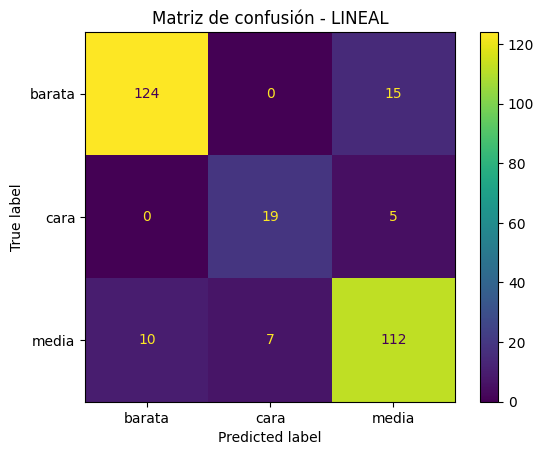

Mejor modelo RBF
              precision    recall  f1-score   support

      barata       0.91      0.92      0.92       139
        cara       0.72      0.75      0.73        24
       media       0.87      0.85      0.86       129

    accuracy                           0.88       292
   macro avg       0.83      0.84      0.84       292
weighted avg       0.88      0.88      0.88       292



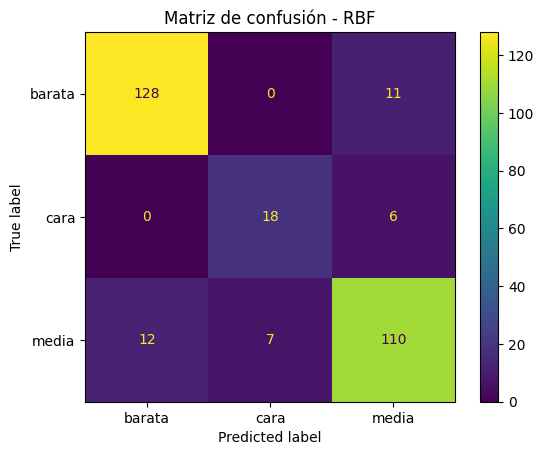

Mejor modelo POLINOMIAL
              precision    recall  f1-score   support

      barata       0.89      0.88      0.88       139
        cara       0.84      0.67      0.74        24
       media       0.82      0.86      0.84       129

    accuracy                           0.85       292
   macro avg       0.85      0.80      0.82       292
weighted avg       0.85      0.85      0.85       292



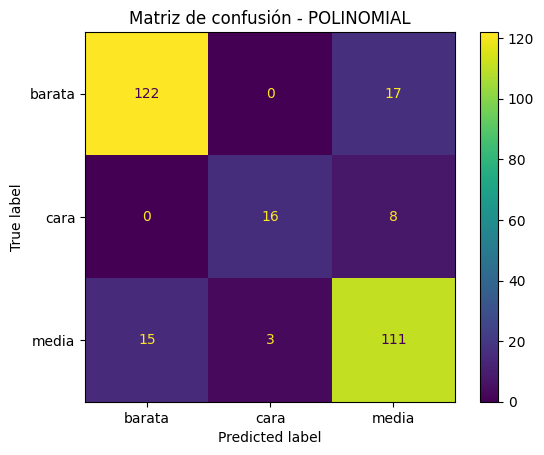

In [5]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Evaluar modelo lineal
best_linear = grid_linear.best_estimator_
y_pred_linear = best_linear.predict(X_test)
print("Mejor modelo LINEAL")
print(classification_report(y_test, y_pred_linear, target_names=label_encoder.classes_))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_linear, display_labels=label_encoder.classes_)
plt.title("Matriz de confusión - LINEAL")
plt.show()

# Evaluar modelo RBF
best_rbf = grid_rbf.best_estimator_
y_pred_rbf = best_rbf.predict(X_test)
print("Mejor modelo RBF")
print(classification_report(y_test, y_pred_rbf, target_names=label_encoder.classes_))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rbf, display_labels=label_encoder.classes_)
plt.title("Matriz de confusión - RBF")
plt.show()

# Evaluar modelo POLINOMIAL
best_poly = grid_poly.best_estimator_
y_pred_poly = best_poly.predict(X_test)
print("Mejor modelo POLINOMIAL")
print(classification_report(y_test, y_pred_poly, target_names=label_encoder.classes_))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_poly, display_labels=label_encoder.classes_)
plt.title("Matriz de confusión - POLINOMIAL")
plt.show()


### 6. Matrices de confusión

A continuación se muestran las matrices de confusión para los tres modelos SVM:


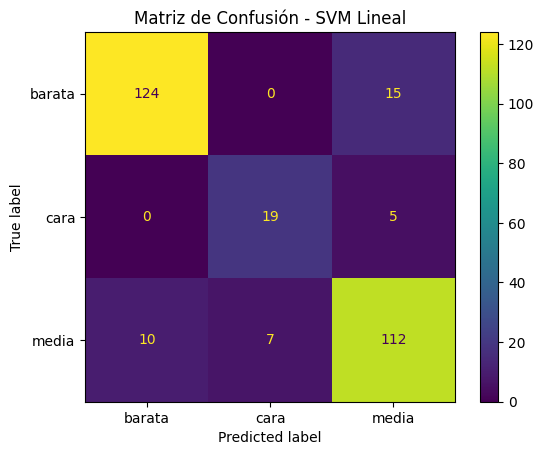

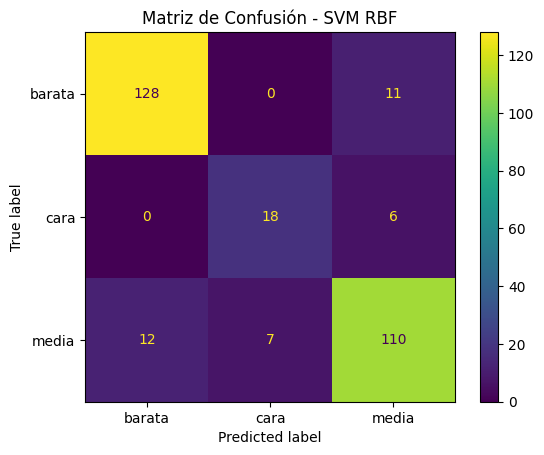

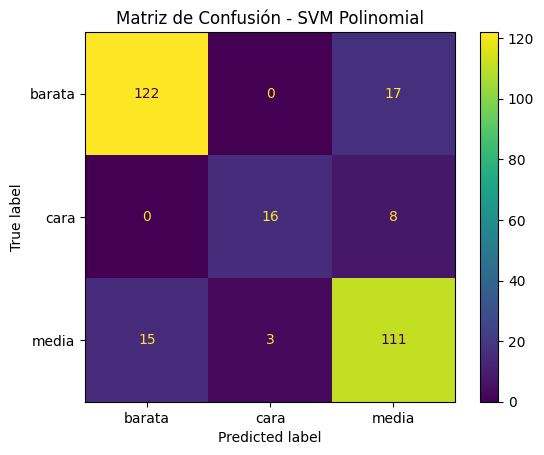

In [6]:
print("A continuación se muestran las matrices de confusión para los tres modelos SVM:")

# Matriz Lineal
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_linear, display_labels=label_encoder.classes_)
plt.title("Matriz de Confusión - SVM Lineal")
plt.grid(False)
plt.show()

# Matriz RBF
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rbf, display_labels=label_encoder.classes_)
plt.title("Matriz de Confusión - SVM RBF")
plt.grid(False)
plt.show()

# Matriz Polinomial
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_poly, display_labels=label_encoder.classes_)
plt.title("Matriz de Confusión - SVM Polinomial")
plt.grid(False)
plt.show()


### 7. ¿Sobreajuste o desajuste?

In [8]:
from sklearn.metrics import accuracy_score, f1_score

# Función para comparar train vs test
def evaluar_sobreajuste(modelo, nombre):
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)
    
    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)
    
    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted')
    
    print(f"Modelo: {nombre}")
    print(f"Accuracy - Train: {acc_train:.4f} | Test: {acc_test:.4f}")
    print(f"F1-score - Train: {f1_train:.4f} | Test: {f1_test:.4f}")
    print("Diferencia de F1:", round(f1_train - f1_test, 4))
    print("")

# Evaluar sobreajuste en los tres modelos optimizados
evaluar_sobreajuste(grid_linear.best_estimator_, "SVM Lineal")
evaluar_sobreajuste(grid_rbf.best_estimator_, "SVM RBF")
evaluar_sobreajuste(grid_poly.best_estimator_, "SVM Polinomial")

Modelo: SVM Lineal
Accuracy - Train: 0.9769 | Test: 0.8733
F1-score - Train: 0.9769 | Test: 0.8741
Diferencia de F1: 0.1028

Modelo: SVM RBF
Accuracy - Train: 0.9974 | Test: 0.8767
F1-score - Train: 0.9974 | Test: 0.8768
Diferencia de F1: 0.1206

Modelo: SVM Polinomial
Accuracy - Train: 0.9983 | Test: 0.8527
F1-score - Train: 0.9983 | Test: 0.8521
Diferencia de F1: 0.1462



### 8. Comparación entre modelos optimizados

In [29]:
def medir_tiempos_promedio(modelo, nombre, repeticiones=5):
    tiempos_entrenamiento = []
    tiempos_prediccion = []

    for _ in range(repeticiones):
        modelo_instancia = modelo
        
        start_train = time.time()
        modelo_instancia.fit(X_train, y_train)
        end_train = time.time()
        tiempos_entrenamiento.append(end_train - start_train)

        start_pred = time.time()
        modelo_instancia.predict(X_test)
        end_pred = time.time()
        tiempos_prediccion.append(end_pred - start_pred)
    
    print(f"Modelo: {nombre}")
    print(f"  Promedio entrenamiento: {sum(tiempos_entrenamiento)/repeticiones:.4f} s")
    print(f"  Promedio predicción:    {sum(tiempos_prediccion)/repeticiones:.4f} s\n")

# Modelos con mejores parámetros
modelo_linear = SVC(kernel='linear', C=0.1)
modelo_rbf = SVC(kernel='rbf', C=10, gamma='scale')
modelo_poly = SVC(kernel='poly', C=1, gamma=0.01, degree=3)

medir_tiempos_promedio(modelo_linear, "SVM Lineal")
medir_tiempos_promedio(modelo_rbf, "SVM RBF")
medir_tiempos_promedio(modelo_poly, "SVM Polinomial")


Modelo: SVM Lineal
  Promedio entrenamiento: 0.0458 s
  Promedio predicción:    0.0055 s

Modelo: SVM RBF
  Promedio entrenamiento: 0.0643 s
  Promedio predicción:    0.0261 s

Modelo: SVM Polinomial
  Promedio entrenamiento: 0.0942 s
  Promedio predicción:    0.0141 s



### 9. Comparación de SVM con modelos anteriores

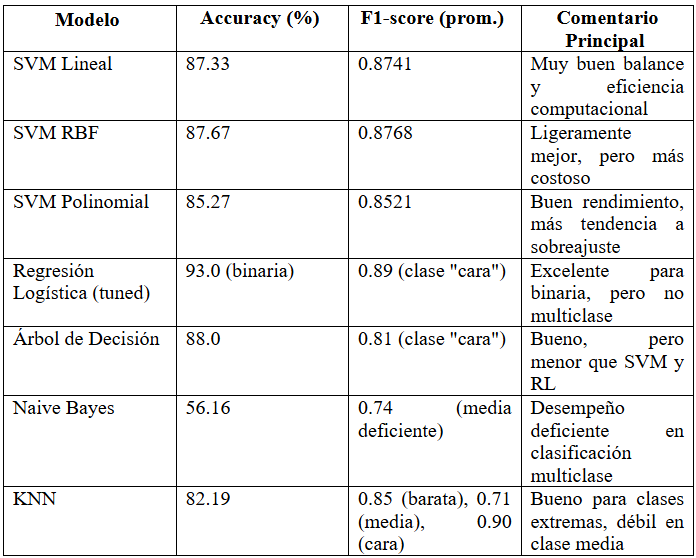

### 10. Modelo más efectivo y su justificación 

De todos los modelos evaluados, el SVM con kernel lineal fue el más efectivo por su buen equilibrio entre precisión (87.33%), tiempo de procesamiento (0.0458 s entrenamiento, 0.0055 s predicción) y baja tendencia al sobreajuste. Aunque el modelo RBF logró una ligera mejora en f1-score, su costo computacional fue mayor. En comparación con otros algoritmos como árboles de decisión o KNN, el modelo lineal de SVM mostró un rendimiento más consistente, especialmente frente a clases desbalanceadas, por lo que se considera la mejor opción para este problema.